<a href="https://colab.research.google.com/github/thotla-vandith/DL-Lesson6/blob/master/DL_ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auto Encoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.5344 - val_loss: 0.4577
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.4238 - val_loss: 0.4058
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3951 - val_loss: 0.3875
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3777 - val_loss: 0.3714
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3628 - val_loss: 0.3581


#### 1. Add one more hidden layer to autoencoder

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
autoencoder1.fit(x_train, x_train,-
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.5013 - accuracy: 0.4590 - val_loss: 0.4166 - val_accuracy: 0.4868
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3924 - accuracy: 0.4913 - val_loss: 0.3788 - val_accuracy: 0.4910
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3648 - accuracy: 0.4957 - val_loss: 0.3549 - val_accuracy: 0.4967
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.3444 - accuracy: 0.5000 - val_loss: 0.3397 - val_accuracy: 0.5010
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3331 - accuracy: 0.5019 - val_loss: 0.3310 - val_accuracy: 0.5022


#### 2. Visualize the input and reconstructed representation of the autoencoder using Matplotlib


In [0]:
prediction = autoencoder1.predict(x_test[[2],:])
#prediction

Input Image

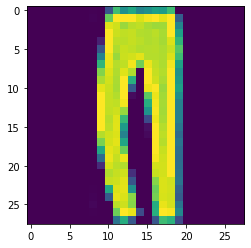

In [10]:
from matplotlib import pyplot as plt
plt.imshow(x_test[2].reshape(28,28))
plt.show()

Reconstructed Image

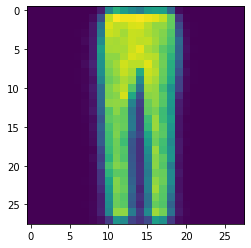

In [19]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

#### 3. Visualize the input, noisy input and reconstructed representation(denosed output) of the Denosing_Autoencoder using Matplotlib


In [0]:
#Adding Noies
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [13]:
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3349 - accuracy: 0.5014 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3301 - accuracy: 0.5021 - val_loss: 0.3193 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3273 - accuracy: 0.5024 - val_loss: 0.3111 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3247 - accuracy: 0.5029 - val_loss: 0.3100 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.3226 - accuracy: 0.5032 - val_loss: 0.3054 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3208 - accuracy: 0.5035 - val_loss: 0.3052 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

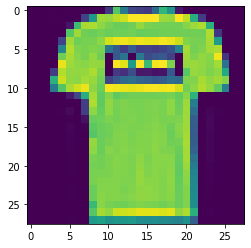

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

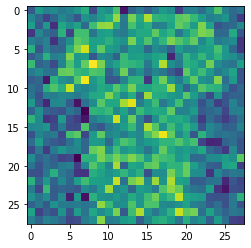

In [15]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

In [0]:
prediction1 = autoencoder1.predict(x_train_noisy[1:])
#prediction1[0]

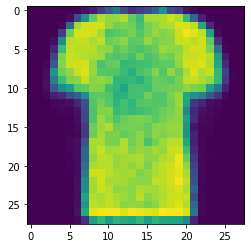

In [17]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

#### 4. Plot loss and accuracy using the history object

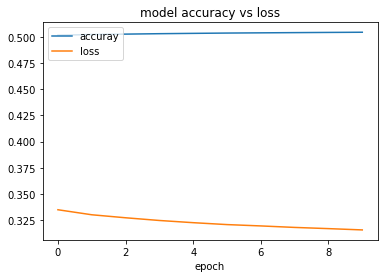

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

train[0:]
(6000,28,28,3)